In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import ErgastTables, Path, show

In [3]:
DATA = Path('/context/data/etl/ergastf1.zip')

In [4]:
tables = ErgastTables(DATA)
tables.names

('circuits',
 'constructor_results',
 'constructors',
 'constructor_standings',
 'driver',
 'driver_standings',
 'lap_times',
 'pit_stops',
 'qualifying',
 'races',
 'results',
 'seasons',
 'status')

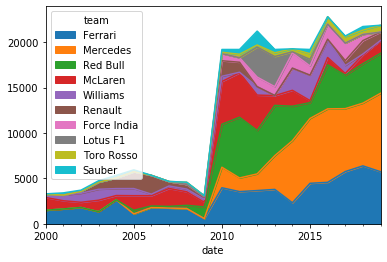

In [55]:
data = ( tables
    .team_standings
    .join(tables.teams['team'], on='team_id')
    .drop('team_id', axis=1)
    .join(tables.races[['date','race']], on='race_id')
    .drop('race_id', axis=1)
    .groupby(['date','team'])
    ['points'].sum()
    .unstack('team')
    .loc['2000':]
    .dropna(axis=1,how='all')
    .resample('y').sum()
    [data.sum().nlargest(10).index]
    )
    
data.plot.area()